Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.


In [1]:
from pandas_datareader import data , wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline 

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [2]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [5]:
bank_stocks = pd.read_pickle("C://Users//piyus//Downloads//all_banks")

In [4]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [81]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

**The max Close price for each bank's stock throughout the time period**

In [6]:
for tick in tickers :
    print(tick,' : ',bank_stocks[tick]['Close'].max())

BAC  :  54.9
C  :  564.1
GS  :  247.92
JPM  :  70.08
MS  :  89.3
WFC  :  58.52


In [7]:
# another m=way of doing the same as above using .xs :
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

**Create a new empty DataFrame called returns. This dataframe will contain the returns for each banks stock. returns are 
typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [12]:
returns = pd.DataFrame()

In [13]:
for tick in tickers:
    returns[tick + ' Return']=bank_stocks[tick]['Close'].pct_change()

In [12]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


**A Pairplot for all the data in return dataframe** 

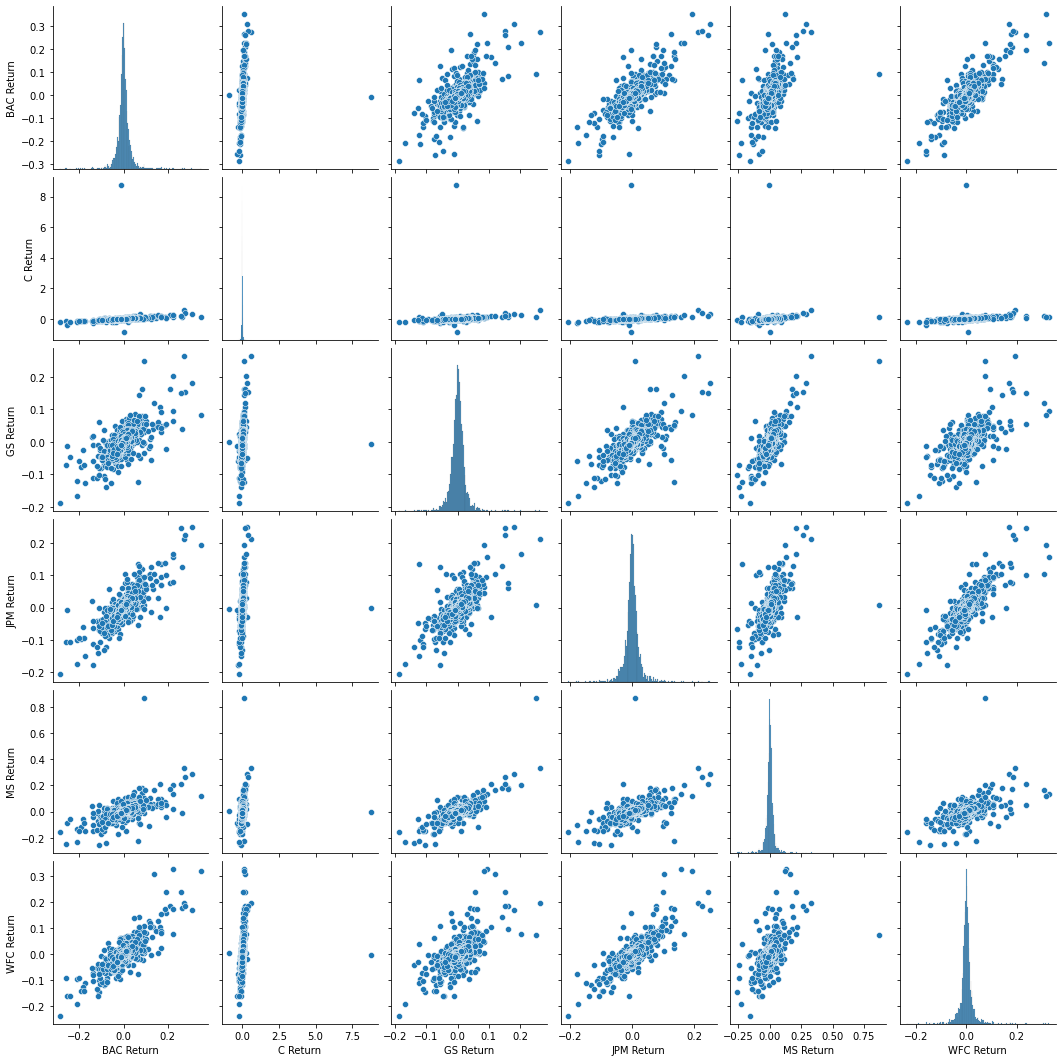

In [16]:
sns.pairplot(returns[1:])

**Minimum return value for any day for respective Banks :**

In [35]:
returns.min()

BAC Return   -0.289694
C Return     -0.899107
GS Return    -0.189596
JPM Return   -0.207274
MS Return    -0.258929
WFC Return   -0.238223
dtype: float64

In [19]:
returns['BAC Return'].min()

-0.2896935933147633

**idxmin() returns the timestamp or in other words the date and the exact time 
for which minimum return occured.**

In [22]:
returns['BAC Return'].idxmin()

Timestamp('2009-01-20 00:00:00')

In [23]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

**Returning the maximum value occurence date for corresponding companies.**

In [36]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

*** Notes :  
   1**.      ***JP Morgan's maximum occured after the inauguration of Barack Hussein    Obama as the 44th president of the United States on the same day (2009-01-    21)***

**2**. ***Citi Bank announced a 1-for-10 reverse stock split on 6th may , 2011***

In [26]:
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

**Looking at the standard deviations alll the companies had in the year 2015.**

In [33]:
returns['2015-01-01':'2015-12-31'].std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

**Creating a Histplot using seaborn of the 2015 returns for Morgan Stanley.**

<AxesSubplot:xlabel='MS Return', ylabel='Count'>

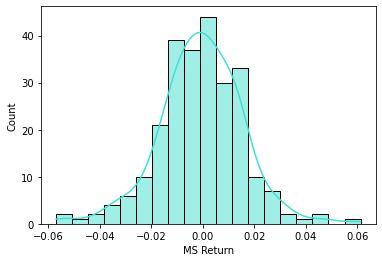

In [45]:
sns.histplot(returns['2015-01-01':'2015-12-31']['MS Return'], kde=True,color='turquoise')

**Creating a Histplot using Seaborn of the 2008 returns for CITI Group**

<AxesSubplot:xlabel='C Return', ylabel='Count'>

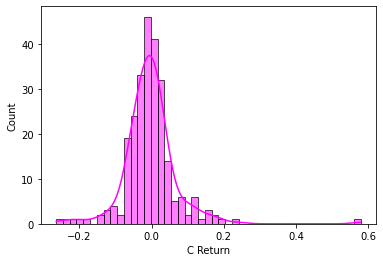

In [40]:
sns.histplot(returns['2008-01-01':'2008-12-31']['C Return'], kde=True,color='magenta')

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

**Creating a line plot showing Close price for each bank for the entire index of time:**

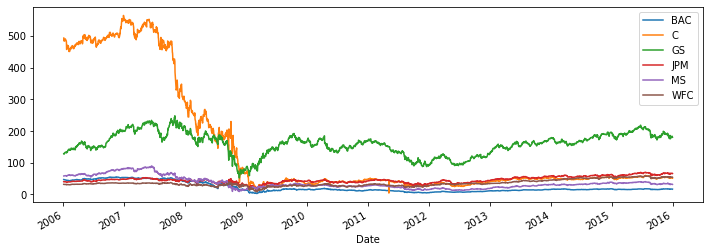

In [63]:
for tick in tickers :
    bank_stocks[tick]['Close'].plot(label=tick,figsize=(12,4))
plt.legend()

**Creating the same plot as above using .xs method or in other words the cross-section method. :**

<AxesSubplot:xlabel='Date'>

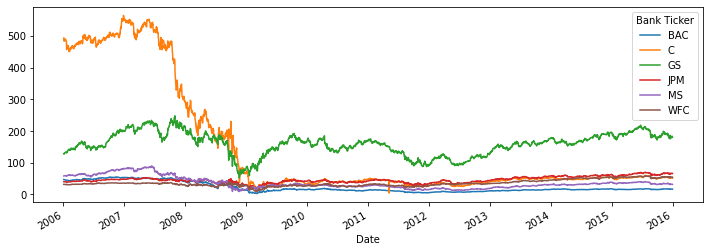

In [65]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(12,4))

**Creating an interactive line plot showing Close Price for each bank and this plot gives more insight into the data . :**

In [9]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

**Plotting the rolling 30-days average against the Close-Price for Bank of America's stock for the year 2008 :**

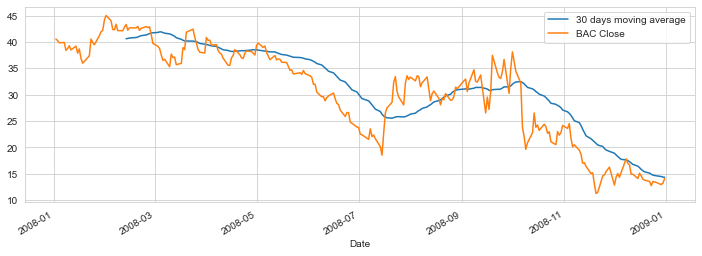

In [18]:
plt.figure(figsize=(12,4))
bank_stocks['BAC']['Close']['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label = '30 days moving average')
bank_stocks['BAC']['Close']['2008-01-01':'2009-01-01'].plot(label = 'BAC Close')
plt.legend()

**Creating a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

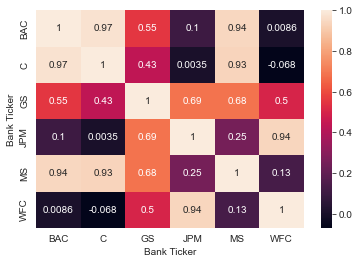

In [23]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)


**Using Seaborn's clustermap to cluster the correlations together :**

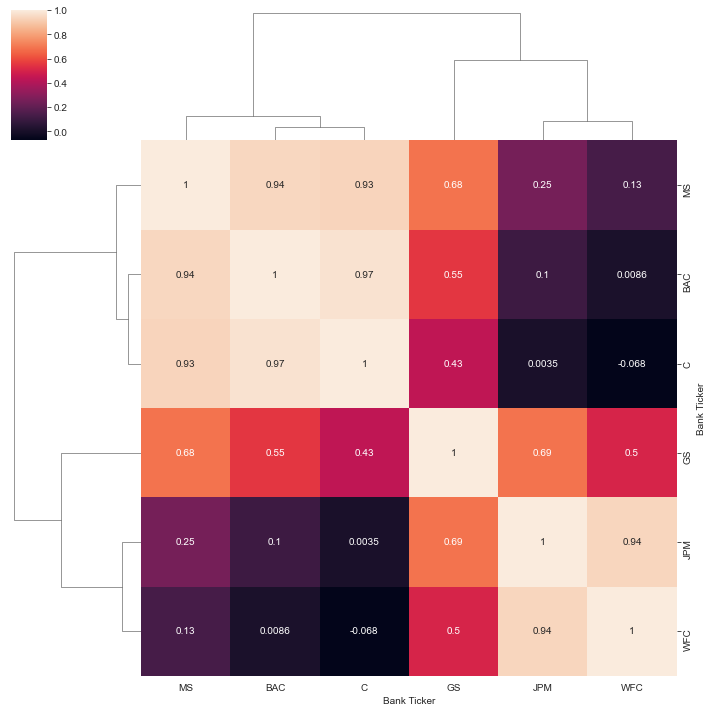

In [24]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)